# Movie Success Prediction

##### Import necessary libraries

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
# Pretty display for notebooks
%matplotlib inline

### Data Cleaning

In [318]:
train_data =  pd.read_excel("C:/Users/samit.singh/Desktop/TSC/Case Study/Training-Test-Data-Case-1.xlsm")
final_test_data = pd.read_excel("C:/Users/samit.singh/Desktop/TSC/Case Study/Validation-Data-Case-1.xlsm")

#### Lets us inspect the train and test data

In [319]:
train_data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [320]:
final_test_data.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,109870115,Spider-Man 3,Spider-Man 3,2007,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for sequences of intense action violence,PG-13,Wide,891
1,50170115,"Hangover 2, The",The Hangover Part II,2011,1,Contemporary Fiction,Original Screenplay,Live Action,Comedy,English,"for pervasive language, strong sexual content ...",R,Wide,586
2,56130115,I am Legend,I am Legend,2007,0,Science Fiction,Based on Fiction Book/Short Story,Live Action,Horror,English,for intense sequences of sci-fi action and vio...,PG-13,Wide,585
3,146810115,Alvin and the Chipmunks Chip Wrecked,Alvin and the Chipmunks: Chipwrecked,2011,1,Kids Fiction,Based on TV,Animation/Live Action,Comedy,English,General,G,Wide,337
4,93880115,Prince of Persia: Sands of Time,Prince of Persia: Sands of Time,2010,0,Fantasy,Based on Game,Live Action,Action,English,For intense sequences of violence and action,PG-13,Wide,335


#### On inspecting the test data, a mismatch is found in name of the columns and the datapoints. Also there is no data for the column "production_budget". So let us correctly label the columns in the  test data set.

In [321]:
final_test_data.columns

Index(['id', 'name', 'display_name', 'production_budget', 'production_year',
       'movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
       'language', 'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name'],
      dtype='object')

In [322]:
correct_column_names = ['id', 'name', 'display_name', 'production_year',
       'movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
       'language', 'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total']

In [323]:
final_test_data.columns = correct_column_names
submission_data = final_test_data.copy()  # making a copy for submission at the end.

In [324]:
final_test_data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total
0,109870115,Spider-Man 3,Spider-Man 3,2007,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for sequences of intense action violence,PG-13,Wide,891
1,50170115,"Hangover 2, The",The Hangover Part II,2011,1,Contemporary Fiction,Original Screenplay,Live Action,Comedy,English,"for pervasive language, strong sexual content ...",R,Wide,586
2,56130115,I am Legend,I am Legend,2007,0,Science Fiction,Based on Fiction Book/Short Story,Live Action,Horror,English,for intense sequences of sci-fi action and vio...,PG-13,Wide,585
3,146810115,Alvin and the Chipmunks Chip Wrecked,Alvin and the Chipmunks: Chipwrecked,2011,1,Kids Fiction,Based on TV,Animation/Live Action,Comedy,English,General,G,Wide,337
4,93880115,Prince of Persia: Sands of Time,Prince of Persia: Sands of Time,2010,0,Fantasy,Based on Game,Live Action,Action,English,For intense sequences of violence and action,PG-13,Wide,335


### Data Exploration

In [325]:
# Finding the number of rows and columns in the train and test data
print ("Total number of records in train_data : {}".format(train_data.shape[0]))
print ("Total number of columns in train_data : {}".format(train_data.shape[1]))
print ("Total number of records in test_data : {}".format(final_test_data.shape[0]))
print ("Total number of records in test_data : {}".format(final_test_data.shape[1]))       

Total number of records in train_data : 1075
Total number of columns in train_data : 15
Total number of records in test_data : 121
Total number of records in test_data : 14


######  So there are 15 columns in the train data and 14 in the test data as the test data does not contain the target variable.

In [326]:
# Lets check if there are any missing values in train or test datasets.
train_data.isnull().values.any(), final_test_data.isnull().values.any()

(False, False)

Clearly there are no missing entries we have to deal with.

#### Featureset Exploration

* **id**: Unique movie id
* **name**: The name of the movie
* **display_name**: Display name of the movie
* **production_year**: 2007,2008, 2009 , 2010 or 2011
* **movie_sequel**: either 0 or 1
* **creative_type**: Science Fiction, Fantasy, Kids Fiction,Super Hero, Historical Fiction, Contemporary Fiction,Dramatization
Factual, Multiple Creative Types
* **source**: Original Screenplay, Based on Fiction Book/Short Story, Based on TV, Based on Theme Park Ride, Based on Comic/Graphic Novel, Based on Factual Book/Article, Based on Musical or Opera, Based on Folk Tale/Legend/Fairytale, Remake, Spin-Off, Based on Game, Based on Toy, Based on Real Life Events, Based on Short Film, Based on Play, Compilation.
* **production_method**: Animation/Live Action, Digital Animation, Live Action, Hand Animation, Stop-Motion Animation, Multiple Production Methods.
* **genre**: Action, Adventure, Thriller/Suspense, Drama, Comedy, Musical, Horror, Romantic Comedy, Western, Documentary, Black Comedy, Concert/Performance, Multiple Genres
* **language**: English, French, Silent, Swedish, Hindi, Spanish, Farsi, Arabic, German, Portuguese, Polish, Danish, Japanese, Italian, Hebrew, Norwegian
* **board_rating_reason**: textual data
* **movie_board_rating_display_name**: PG-13, G, PG, R, Not Rated, NC-17
* **movie_release_pattern_display_name**: Wide, Limited, Expands Wide, Exclusive, Special Engagement
* **total**: continuous value

## Preparing the data

Let us explore the variable total. First lets plot its histogram to see if the variable is normally distributed or skewed.

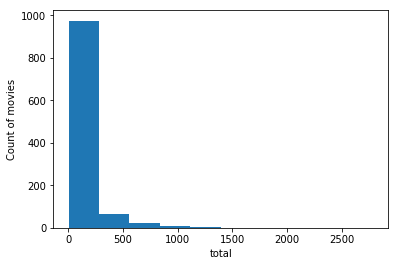

In [327]:
# Plotting histogram of the continuous variable "total"
_= plt.hist(train_data['total'])
_= plt.xlabel("total")
_= plt.ylabel("Count of movies")
plt.show()

Quite clearly the 'total' varaible is positively skewed.

#### Transforming Skewed Continuous Features

For highly-skewed feature distributions such as 'total' , it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In [328]:
train_data['total'] = np.log(train_data['total'] + 1)    # Using log transform on train and test data.
final_test_data['total'] =  np.log(final_test_data['total'] + 1)

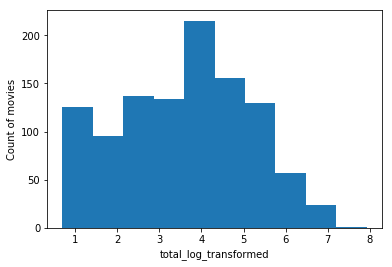

In [329]:
_= plt.hist(train_data['total'])
_= plt.xlabel("total_log_transformed")
_= plt.ylabel("Count of movies")
plt.show()

#### Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners.

In [330]:
# Initialize a scaler, then apply it to the total columns in train and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
train_data['total'] = scaler.fit_transform(train_data[['total']])
final_test_data['total'] = scaler.transform(final_test_data[['total']]) 

In [331]:
train_data.shape, final_test_data.shape

((1075, 15), (121, 14))

#### Implementation: Data Preprocessing

We can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature.

In [332]:
categorical_columns = ['production_year','movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
       'language', 'movie_board_rating_display_name','movie_release_pattern_display_name']

In [333]:
train_data = pd.get_dummies(train_data, columns = categorical_columns)
final_test_data = pd.get_dummies(final_test_data, columns = categorical_columns)

#### Now let us drop all unnecessary features that we won't be using in our machine learning algorithm.

In [334]:
train_data.drop(columns = ['id', 'name', 'display_name', 'board_rating_reason'], inplace = True)
final_test_data.drop(columns = ['id', 'name', 'display_name', 'board_rating_reason'], inplace = True)

In [335]:
encoded = list(train_data.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

82 total features after one-hot encoding.


Note: The test set could be small and some values could be absent? We will need to add the missing columns, filled with zeroes as shown below:

In [336]:
def add_missing_dummy_columns( d, columns):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0

In [337]:
add_missing_dummy_columns(final_test_data, encoded)

In [338]:
final_test_data.drop(columns = ['Category'], inplace = True) # removing column Category from the test set. It was inadvertently
                                                            # by add_missing_dummy_columns function above.


In [339]:
train_data.shape, final_test_data.shape

((1075, 82), (121, 81))

#### Checking if the training data is balanced or imbalanced?

In [340]:
train_data.groupby(['Category'])['Category'].count()

Category
1    151
2    223
3    221
4    186
5    119
6     72
7     55
8     31
9     17
Name: Category, dtype: int64

The training data is imbalanced, the data points in Category 6,7,8 and 9 are heavily underrepresented. This may affect out classification model. To correct this we can use the SMOTE technique to construct a more balanced dataset. Rather than replicating the minority observations , Synthetic Minority Oversampling (SMOTE) works by creating synthetic observations based upon the existing minority observations. 

#### Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. We will now split the train_data into training and test sets for internal cross validation purpose. 75% of the data will be used for training and 25% for testing and refining our model.

In [341]:
#Import train_test_split
from sklearn.model_selection import train_test_split

train_data_y = train_data['Category']
train_data_x = train_data.drop('Category', axis=1)

# Split the train_data from above into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.25, random_state = 42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 806 samples.
Testing set has 269 samples.


In [342]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

# Show the results of the resampling
print ("Resampled training set has {} samples.".format(X_train_resampled.shape[0]))

Resampled training set has 1548 samples.


In [343]:
# Show the distribution after SMOTE resampling
a = pd.DataFrame(y_train_resampled, columns = ["Category"])
a.groupby(['Category'])['Category'].count()

Category
1    172
2    172
3    172
4    172
5    172
6    172
7    172
8    172
9    172
Name: Category, dtype: int64

The X_train_resampled and y_train_resampled are now balanced, we can proceed further and develop a model.

### Developing a model

##### Implementation - Creating a Training and Predicting Pipeline

To properly evaluate the performance of each model we've chosen, it's important that we create a training and predicting pipeline that allows us to quickly and effectively train models and perform predictions on the testing data. 

In [223]:
# Import metrics from sklearn - accuracy_score
from sklearn.metrics import accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    # Fit the learner to the training data 
    learner = learner.fit(X_train, y_train)
        
    # Get the predictions on the test set(X_test),
    predictions_test = learner.predict(X_test)        
           
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
               
    # Success
    print ("{} training complete ".format(learner.__class__.__name__))
        
    # Return the results
    return results

First, We will try a quick and dirty implementation of the following Supervised Learning algorithms and compare our model's performance on the accuracy metric. This will give us an idea as to which model is performing better and should be fine tuned further.

* **K nearest neighbours**
* **Support Vector Machines (SVM)**
* **Random Forest**
* **Logistic Regression**

In [344]:
# Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [345]:
#  Initialize the three models
clf_A = KNeighborsClassifier(n_neighbors=42)  
clf_B = SVC(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)
clf_D = LogisticRegression(random_state=42)

In [346]:
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train_resampled, y_train_resampled, X_test, y_test)

KNeighborsClassifier training complete 
SVC training complete 
RandomForestClassifier training complete 
LogisticRegression training complete 


#### Plotting the evaluation metrics for different classifiers

In [347]:
result_df = pd.DataFrame.from_dict(results).T

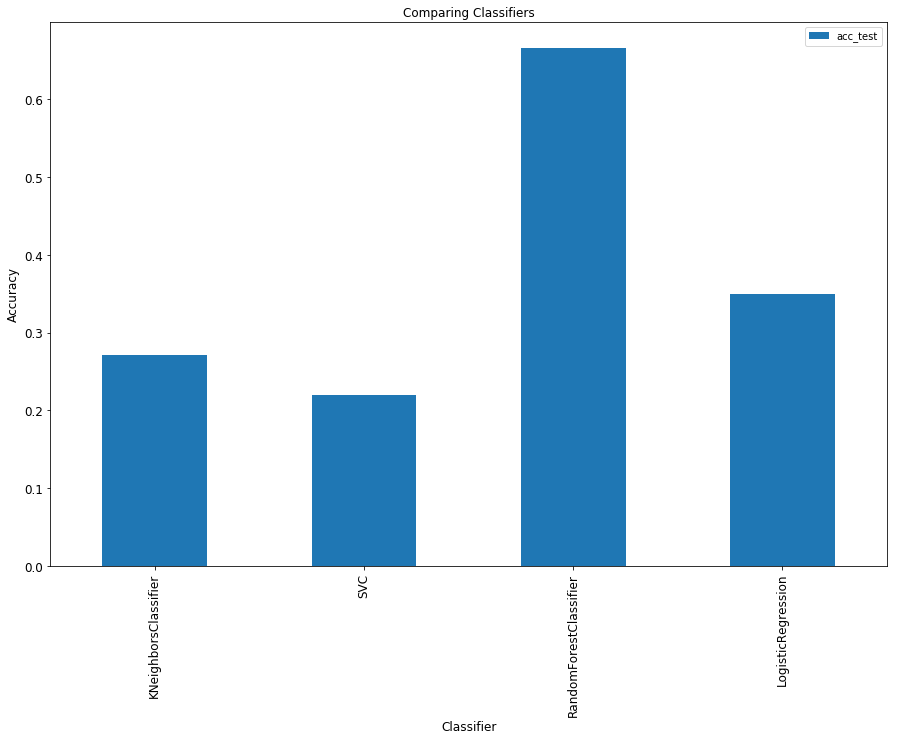

In [348]:
ax = result_df[['acc_test']].plot(kind='bar', title ="Comparing Classifiers", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Classifier", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
plt.show()

The Random Forest model clearly outperforms other models. So going forward we shall be using Random Forest to further improve our prediction accuracy.

### Improving Results

We will perform a grid search optimization for the model over the parameters max_depth and number_of_estimators to further refine our model. We will use the error metric accuracy.

In [349]:
# Import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV

# Initialize the classifier
clf = RandomForestClassifier(random_state = 42)

# Parameters list we wish to tune
parameters = {'max_depth': range(1,25), 'n_estimators': range(15,50)}

# Perform grid search on the classifier using 'accuracy' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,param_grid=parameters,scoring='accuracy')

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_resampled, y_train_resampled)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = clf_C.predict(X_test)
best_predictions = best_clf.predict(X_test)

In [350]:
# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Best Parameters for the model is: {}".format(grid_fit.best_params_))

Unoptimized model
------
Accuracy score on testing data: 0.6654

Optimized Model
------
Final accuracy score on the testing data: 0.7472
Best Parameters for the model is: {'max_depth': 15, 'n_estimators': 48}


So, After fine tuning, our accuracy has improved from 0.6654 to 0.7472. 

### Confusion Matrix

Next we shall plot the confusion matrix.

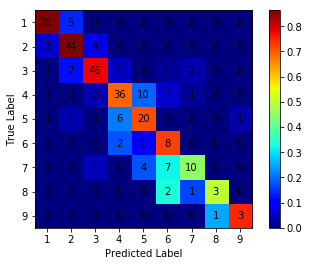

In [353]:
from sklearn.metrics import confusion_matrix
conf_arr = confusion_matrix(y_test, best_predictions)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x),horizontalalignment='center', verticalalignment='center')

cb = fig.colorbar(res)
plt.xticks(range(width), range(1,10))
plt.yticks(range(height), range(1,10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix.png', format='png')

### Feature Importance

An important task when performing supervised learning on a dataset like the data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict how successful the movie will be.

In [354]:
importances = best_clf.feature_importances_

Feature ranking:
1. total (0.361861)
2. production_year_2007 (0.033676)
3. production_year_2008 (0.028542)
4. production_year_2009 (0.025988)
5. production_year_2010 (0.025962)
6. production_year_2011 (0.025359)
7. movie_sequel_0 (0.024453)
8. movie_sequel_1 (0.021913)
9. creative_type_Contemporary Fiction (0.021335)
10. creative_type_Dramatization (0.021243)
11. creative_type_Factual (0.020771)
12. creative_type_Fantasy (0.020471)
13. creative_type_Historical Fiction (0.020281)
14. creative_type_Kids Fiction (0.020096)
15. creative_type_Multiple Creative Types (0.019140)
16. creative_type_Science Fiction (0.018770)
17. creative_type_Super Hero (0.017494)
18. source_Based on Comic/Graphic Novel (0.016982)
19. source_Based on Factual Book/Article (0.016852)
20. source_Based on Fiction Book/Short Story (0.016405)
21. source_Based on Folk Tale/Legend/Fairytale (0.016085)
22. source_Based on Game (0.014019)
23. source_Based on Musical or Opera (0.012977)
24. source_Based on Play (0.011992)

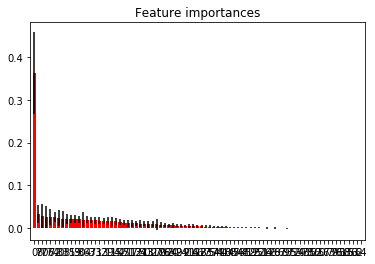

In [235]:
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Using the best classifier to predict the target on the final test set for submission

In [355]:
test_prediction = best_clf.predict(final_test_data)

In [356]:
submission_data["Category"] = test_prediction

In [358]:
# Save the predictions out to a CSV file
submission_data.to_csv("C:/Users/samit.singh/Desktop/TSC/Case Study/predictions.csv", index=False)
print("Done!")

Done!
